In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

# Useful plotting thingies:
%matplotlib inline
plt.style.use('ggplot')
pylab.rcParams['figure.figsize'] = 16, 16



In [22]:
import tables as tb
from sklearn.preprocessing import Normalizer, scale

# Set up the experimental matrices:
targets = ['ADAS11_bl', 'ADAS13_bl', 'MMSE_bl']
varnames = ['CT_VOL', 'L_HC_VOL', 'R_HC_VOL']
targets_regex = '|'.join(['^{}$'.format(t) for t in targets])
#modalities = ['CT', 'L_HC', 'R_HC']
modalities = ['CT']
l_segment_regex = '^L_HC_'
r_segment_regex = '^R_HC_'
modalities_regex = '|'.join(['^{}_'.format(m) for m in modalities])

matrices = []
l_D = []
r_D = []
for split in ['train', 'valid', 'test']:
    frame = pd.read_pickle('/projects/francisco/data/ADNI/cli_ct_seg_fused_{}.pkl'.format(split))
    ct = frame.filter(regex=modalities_regex).as_matrix()
    y_cur = frame.filter(regex=targets_regex).as_matrix()
    y_cur[np.isnan(y_cur)] = np.nanmean(y_cur)
    l_segs = frame.filter(regex=l_segment_regex).as_matrix()
    r_segs = frame.filter(regex=r_segment_regex).as_matrix()
    ct_vol = np.sum(ct, axis=1)
    l_hc_vol = np.sum(l_segs, axis=1)
    r_hc_vol = np.sum(r_segs, axis=1)
    matrices.append([y_cur, ct_vol, l_hc_vol, r_hc_vol])
    

In [23]:
from matplotlib import pyplot as plt

#frame = pd.read_pickle('/projects/francisco/data/ADNI/cli_ct_seg_fused_train.pkl'.format(split))
frame = pd.read_pickle('/projects/francisco/data/ADNI/master_fused.pkl'.format(split))
l_segs = frame.filter(regex=l_segment_regex).as_matrix()
r_segs = frame.filter(regex=r_segment_regex).as_matrix()
ct = frame.filter(regex=modalities_regex).as_matrix()
y_cur = frame.filter(regex=targets_regex).as_matrix()
y_cur[np.isnan(y_cur)] = np.nanmean(y_cur)
classes = frame['DX_bl'].as_matrix()
c = classes
c[c=='AD'] = 0
c[c=='CN'] = 1
c[c=='LMCI'] = 2

In [24]:
import h5py as h5

fused_segmentations_path = '/projects/nikhil/miccai/input_data_comb/ad_mci_cn_{}.h5'



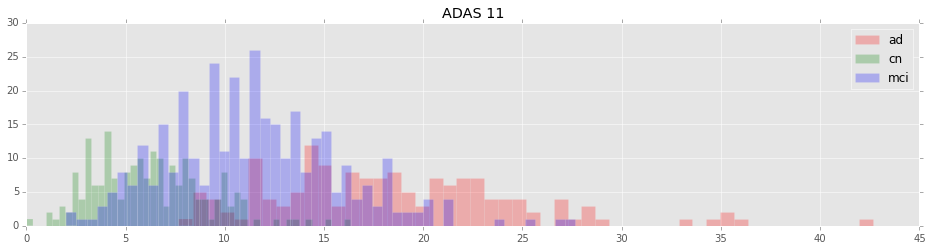

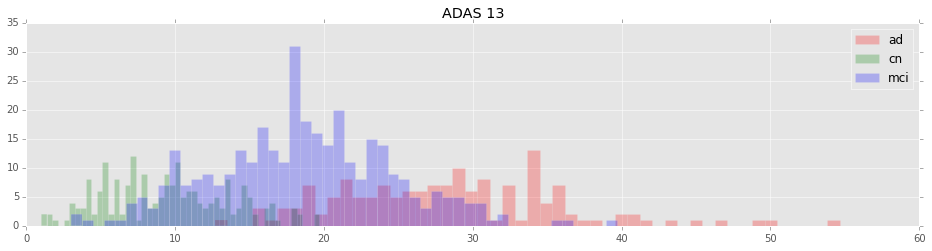

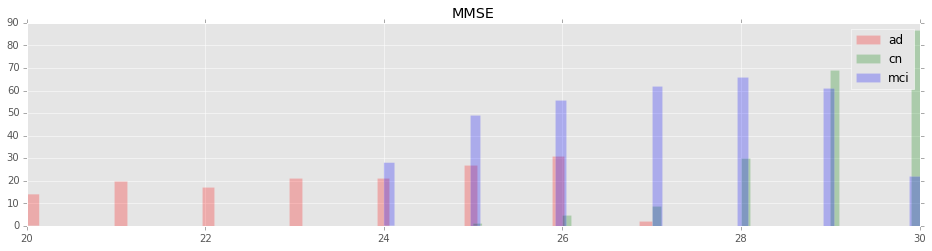

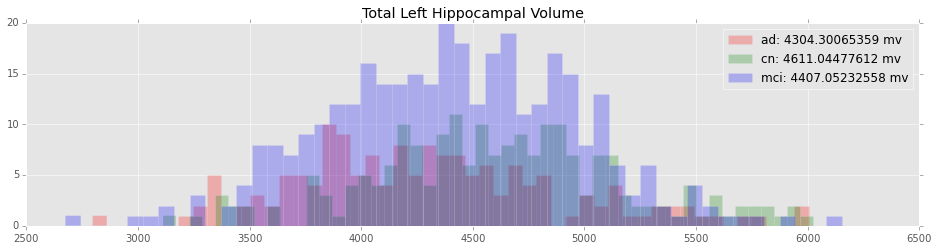

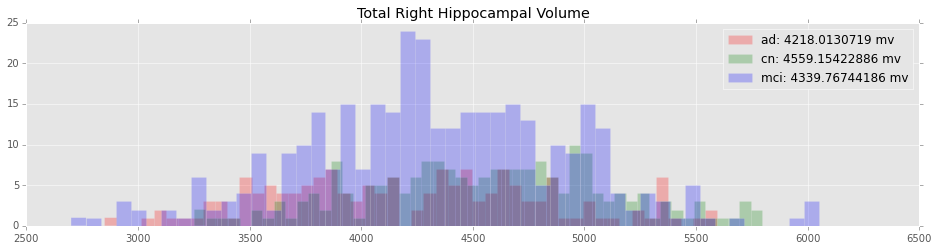

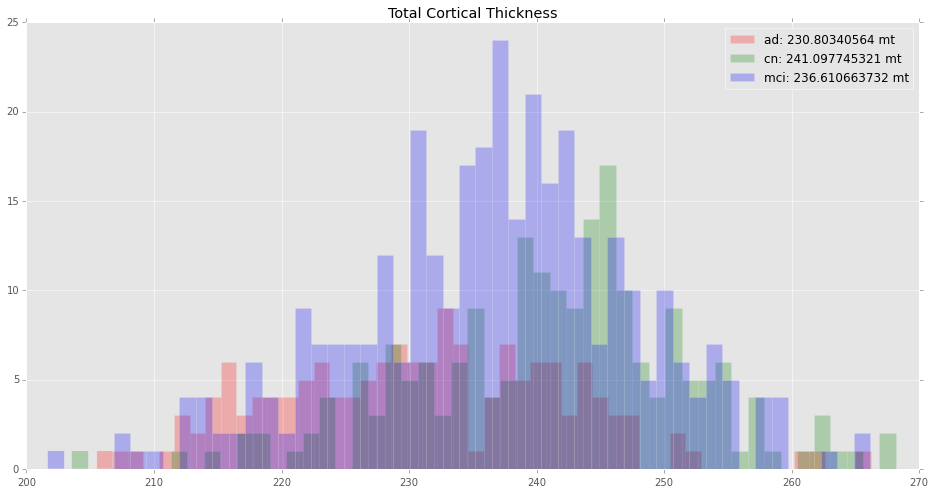

In [25]:
indad = np.where(classes==0)[0]
indcn = np.where(classes==1)[0]
indmci = np.where(classes==2)[0]

l_segs_ad = l_segs[indad]
r_segs_ad = r_segs[indad]

l_segs_cn = l_segs[indcn]
r_segs_cn = r_segs[indcn]

l_segs_mci = l_segs[indmci]
r_segs_mci = r_segs[indmci]

l_vols_ad = np.sum(l_segs_ad, axis=1)
l_vols_cn = np.sum(l_segs_cn, axis=1)
l_vols_mci = np.sum(l_segs_mci, axis=1)

r_vols_ad = np.sum(r_segs_ad, axis=1)
r_vols_cn = np.sum(r_segs_cn, axis=1)
r_vols_mci = np.sum(r_segs_mci, axis=1)

ct_ad = ct[indad]
ct_cn = ct[indcn]
ct_mci = ct[indmci]

adas11_ad = y_cur[indad,0]
adas11_cn = y_cur[indcn,0]
adas11_mci = y_cur[indmci,0]

adas13_ad = y_cur[indad,1]
adas13_cn = y_cur[indcn,1]
adas13_mci = y_cur[indmci,1]

mmse_ad = y_cur[indad,2]
mmse_cn = y_cur[indcn,2]
mmse_mci = y_cur[indmci,2]

total_ct_ad = np.sum(ct_ad, axis=1)
total_ct_cn = np.sum(ct_cn, axis=1)
total_ct_mci = np.sum(ct_mci, axis=1)

pylab.rcParams['figure.figsize'] = 16, 8

plt.subplot(2,1,1)
plt.hist(adas11_ad, bins=50,color='r', alpha=0.25, label='ad')
plt.hist(adas11_cn, bins=50,color='g', alpha=0.25, label='cn')
plt.hist(adas11_mci, bins=50,color='b', alpha=0.25, label='mci')
plt.legend()
plt.title('ADAS 11')
plt.show()

plt.subplot(2,1,1)
plt.hist(adas13_ad, bins=50,color='r', alpha=0.25, label='ad')
plt.hist(adas13_cn, bins=50,color='g', alpha=0.25, label='cn')
plt.hist(adas13_mci, bins=50,color='b', alpha=0.25, label='mci')
plt.legend()
plt.title('ADAS 13')
plt.show()

plt.subplot(2,1,1)
plt.hist(mmse_ad, bins=50,color='r', alpha=0.25, label='ad')
plt.hist(mmse_cn, bins=50,color='g', alpha=0.25, label='cn')
plt.hist(mmse_mci, bins=50,color='b', alpha=0.25, label='mci')
plt.legend()
plt.title('MMSE')
plt.show()


plt.subplot(2,1,1)
plt.hist(l_vols_ad, bins=50, color='r', alpha=0.25, label='ad: {} mv'.format(np.mean(l_vols_ad)))
plt.hist(l_vols_cn, bins=50, color='g', alpha=0.25, label='cn: {} mv'.format(np.mean(l_vols_cn)))
plt.hist(l_vols_mci, bins=50, color='b', alpha=0.25, label='mci: {} mv'.format(np.mean(l_vols_mci)))
plt.legend()
plt.title('Total Left Hippocampal Volume')
plt.show()

plt.subplot(2,1,2)
plt.hist(r_vols_ad, bins=50,color='r', alpha=0.25, label='ad: {} mv'.format(np.mean(r_vols_ad)))
plt.hist(r_vols_cn, bins=50,color='g', alpha=0.25, label='cn: {} mv'.format(np.mean(r_vols_cn)))
plt.hist(r_vols_mci, bins=50,color='b', alpha=0.25, label='mci: {} mv'.format(np.mean(r_vols_mci)))
plt.legend()
plt.title('Total Right Hippocampal Volume')
plt.show()

plt.subplot(1,1,1)
plt.hist(total_ct_ad, bins=50,color='r', alpha=0.25, label='ad: {} mt'.format(np.mean(total_ct_ad)))
plt.hist(total_ct_cn, bins=50,color='g', alpha=0.25, label='cn: {} mt'.format(np.mean(total_ct_cn)))
plt.hist(total_ct_mci, bins=50,color='b', alpha=0.25, label='mci: {} mt'.format(np.mean(total_ct_mci)))
plt.legend()
plt.title('Total Cortical Thickness')
plt.show()
pylab.rcParams['figure.figsize'] = 16, 16


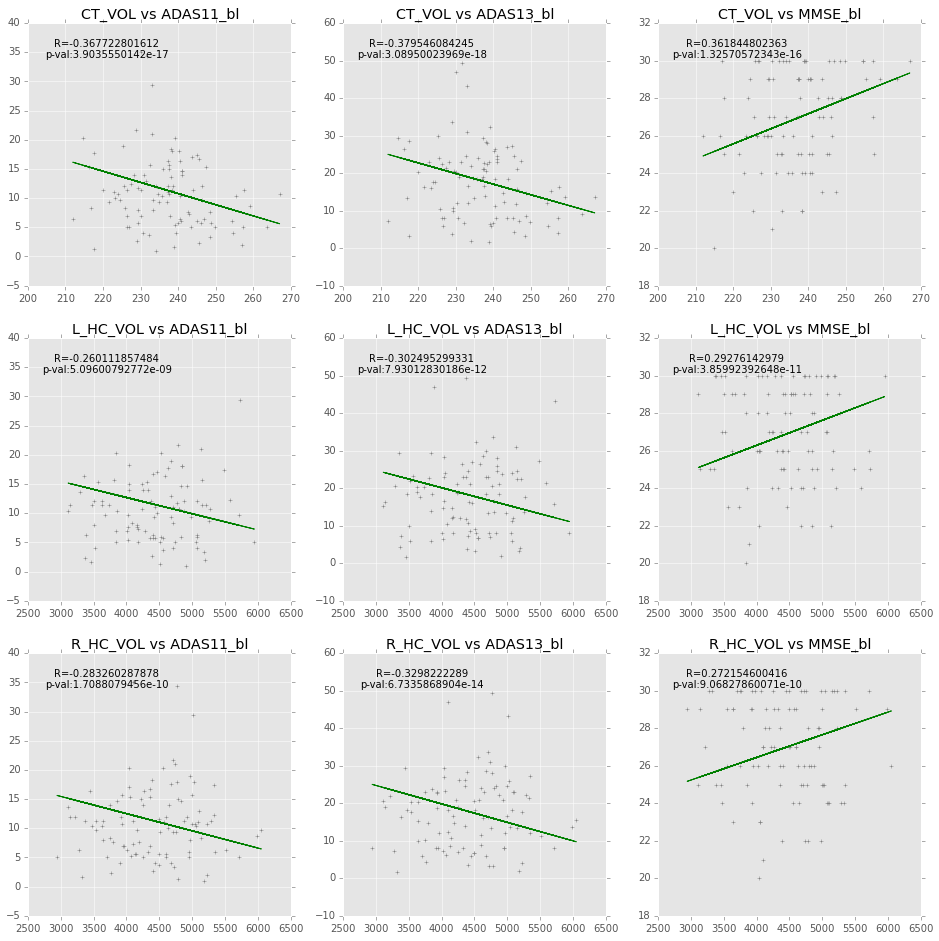

In [27]:
from tabulate import tabulate
import scipy

f = 0
for v, vname in enumerate(varnames):
    X, y = matrices[0][v+1].reshape((-1,1)), matrices[0][0]
    X_v, y_v = matrices[1][v+1].reshape((-1,1)), matrices[1][0]
    for t, tname in enumerate(targets):
        f += 1  
        ax=plt.subplot(3,3,f)
        plt.title('{} vs {}'.format(vname, tname))
        slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(X.ravel(),y[:,t])
        y_hat_v = intercept + slope * X_v
        
        # Plot outputs
        plt.scatter(X_v, y_v[:,t], marker='+', color='gray')
        plt.plot(X_v, y_hat_v, color='green', linewidth=1)
        plt.text(0.3, 0.9,'R={}\np-val:{}'.format(r_value, p_value), horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)

plt.grid()    
plt.show()



In [28]:
# Univariate regression on individual CT vars
frame = pd.read_pickle('/projects/francisco/data/ADNI/cli_ct_seg_fused_train.pkl')
frame = frame[np.isfinite(frame['ADAS11_bl']) & np.isfinite(frame['ADAS13_bl']) & np.isfinite(frame['MMSE_bl'])]
ct = frame.filter(regex='^CT_|^L_HC_VOL|^R_HC_VOL')
y_cur = frame.filter(regex=targets_regex).as_matrix()

scores = []
for i, var in enumerate(ct.keys()):
    cur_scores = [var]
    for t in range(3):
        x = ct[var].as_matrix()
        y = y_cur[:,t]
        slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x.ravel(), y)
        cur_scores.append(r_value)
        cur_scores.append(p_value)
    scores.append(tuple(cur_scores))

In [29]:
from IPython.display import display
from pandas import DataFrame

scores.sort(reverse=True, key=lambda s: abs(s[1] + s[3] + s[5]))
header = ['CT Var']
header2 = zip(['r {}'.format(t) for t in targets], ['p-val {}'.format(t) for t in targets])
header = header + [val for pair in header2 for val in pair]
score_table = DataFrame(scores, columns=header)
print 'r scores'
display(score_table)

r scores


,CT Var,r ADAS11_bl,p-val ADAS11_bl,r ADAS13_bl,p-val ADAS13_bl,r MMSE_bl,p-val MMSE_bl
0,CT_MTG.L,-0.390080,5.294251e-19,-0.412240,3.067663e-21,0.340954,1.299178e-14
1,CT_TPOsup.L,-0.412643,2.783587e-21,-0.431917,2.268010e-23,0.384663,1.759861e-18
2,CT_STG.L,-0.387135,1.020133e-18,-0.403611,2.387232e-20,0.339229,1.796074e-14
3,CT_TPOsup.R,-0.414751,1.669747e-21,-0.437478,5.341385e-24,0.436360,7.158478e-24
4,CT_TPOmid.L,-0.367177,7.318555e-17,-0.383561,2.240903e-18,0.341611,1.147743e-14
5,CT_MTG.R,-0.339411,1.735888e-14,-0.368924,5.093392e-17,0.307861,4.609390e-12
6,CT_PCG.L,-0.370583,3.603232e-17,-0.372051,2.648369e-17,0.348076,3.336877e-15
7,CT_ANG.L,-0.328048,1.397452e-13,-0.348487,3.081999e-15,0.296800,2.803688e-11
8,CT_PCG.R,-0.336824,2.812014e-14,-0.349196,2.686009e-15,0.312439,2.134656e-12
9,CT_ITG.L,-0.357270,5.479982e-16,-0.370182,3.918994e-17,0.359587,3.444000e-16


/projects/francisco/miniconda/envs/nn/lib/python2.7/site-packages/matplotlib/axes/_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)
/projects/francisco/miniconda/envs/nn/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


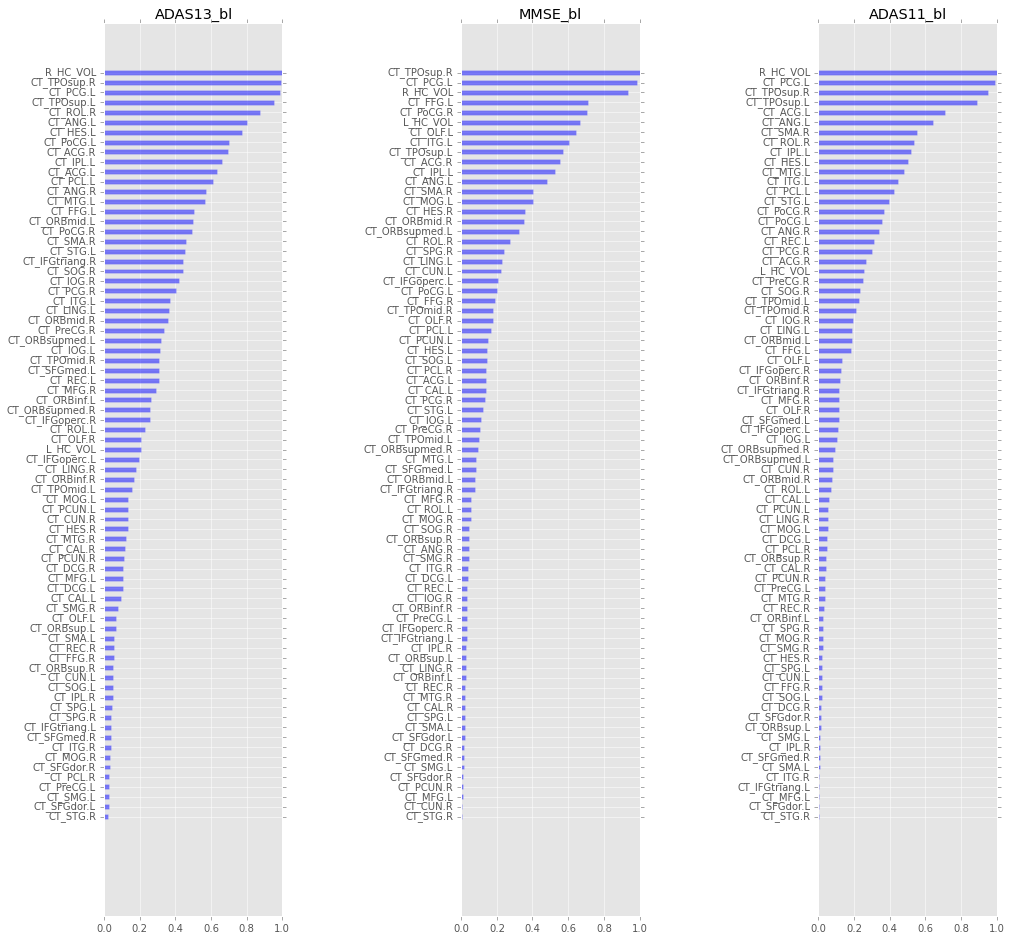

In [31]:
from sklearn.linear_model import RandomizedLasso

# Randomized lasso feature selection
lasso_scores = []
var_names = ct.columns
X = ct.as_matrix()
plt.cla()
plt.subplots_adjust(wspace=1.0)
for t, target in enumerate(targets):
    y = y_cur[:,t]
    rlasso = RandomizedLasso(normalize=True, n_resampling=1000)
    rlasso.fit(X, y)
    lasso_scores.append(rlasso.scores_)
    feats = zip(var_names, rlasso.scores_)
    feats.sort(reverse=False, key=lambda x: abs(x[1]))
    plt.subplot(1,3, t)
    plt.title('{}'.format(target))
    y_pos = np.arange(len(feats))
    plt.barh(y_pos, width=zip(*feats)[1], height=0.5, color='b', align="center", alpha=0.5)
    plt.yticks(y_pos, zip(*feats)[0])    

plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Randomized lasso feature selection
rf_scores = []
X = ct.as_matrix()
plt.cla()
plt.subplots_adjust(wspace=1.0)
for t, target in enumerate(targets):
    y = y_cur[:,t]
    forest = RandomForestRegressor()
    forest.fit(X, y)
    rf_scores.append(rlasso.scores_)
    feats = zip(var_names, forest.feature_importances_)
    feats.sort(reverse=False, key=lambda x: abs(x[1]))
    plt.subplot(1,3, t)
    plt.title('{}'.format(target))
    y_pos = np.arange(len(feats))
    plt.barh(y_pos, width=zip(*feats)[1], height=0.5, color='b', align="center", alpha=0.5)
    plt.yticks(y_pos, zip(*feats)[0])    

plt.legend()
plt.show()